<a href="https://colab.research.google.com/github/ibacaraujo/pytorch-learning/blob/master/torchvision_detection_finetuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Torchvision Object Detection Finetuning

In [5]:
%%shell

pip install cython
# Install pycocotools
pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-u3qp85oe
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-u3qp85oe
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=275299 sha256=d9ddb701bcb41dcc98fafde7e74703afe6ee16d97a6c50f00e82de7289ed188f
  Stored in directory: /tmp/pip-ephem-wheel-cache-voltbkn0/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
  Found existing installation: pycocotools 2.0.0
    Uninstalling pycocotools-2.0.0:
      Successfully uninstalled pycocotools-2.0.0


In [6]:
%%shell

# Download the dataset used
wget https://www.cis.upenn.edu/~jshi/ped_html/PennFudanPed.zip .
# Extract it in the current folder
unzip PennFudanPed.zip

--2020-04-12 02:21:52--  https://www.cis.upenn.edu/~jshi/ped_html/PennFudanPed.zip
Resolving www.cis.upenn.edu (www.cis.upenn.edu)... 158.130.69.163, 2607:f470:8:64:5ea5::d
Connecting to www.cis.upenn.edu (www.cis.upenn.edu)|158.130.69.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53723336 (51M) [application/zip]
Saving to: ‘PennFudanPed.zip.1’

PennFudanPed.zip.1  100%[===================>]  51.23M   939KB/s    in 52s     

2020-04-12 02:22:45 (1003 KB/s) - ‘PennFudanPed.zip.1’ saved [53723336/53723336]

--2020-04-12 02:22:45--  http://./
Resolving . (.)... failed: No address associated with hostname.
wget: unable to resolve host address ‘.’
FINISHED --2020-04-12 02:22:45--
Total wall clock time: 53s
Downloaded: 1 files, 51M in 52s (1003 KB/s)
Archive:  PennFudanPed.zip
replace PennFudanPed/added-object-list.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: PennFudanPed/added-object-list.txt  
replace PennFudanPed/Annotation/FudanPed00001.txt? [

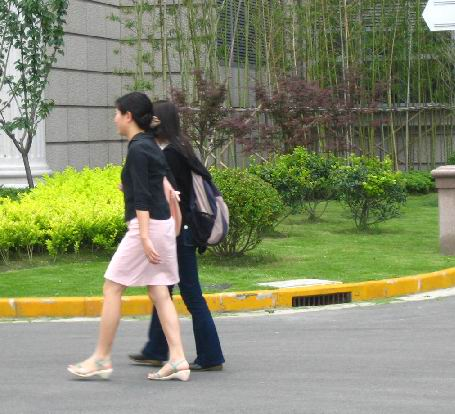

In [7]:
from PIL import Image
Image.open('PennFudanPed/PNGImages/FudanPed00002.png')

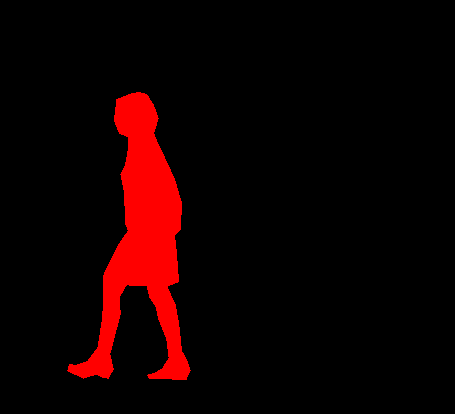

In [8]:
mask = Image.open('PennFudanPed/PedMasks/FudanPed00002_mask.png')
mask.putpalette([
  0, 0, 0, # background
  255, 0, 0, # index 1
  0, 255, 0, # index 2
  0, 255, 255,
])
mask

In [0]:
import os
import numpy as np
import torch
import torch.utils.data
from PIL import Image

class PennFudanDataset(torch.utils.data.Dataset):
  def __init__(self, root, transform=None):
    self.root = root
    self.transform = transform
    # load all images sorted
    self.imgs = list(sorted(os.listdir(os.path.join(root, "PNGImages"))))
    self.masks = list(sorted(os.listdir(os.path.join(root, "PedMasks"))))

  def __getitem__(self, idx):
    pass

  def __len__(self.imgs):
    pass